# Supervised Machine Learning with Random Forest

__Kaggle__

https://www.kaggle.com/mlg-ulb/creditcardfraud

__Goal:__ Identify fraudulent credit card transactions


__Steps:__
1. Import Libraries
2. Import Data
3. Analyse the Data
4. Prepare the Data to Feed the Model
5. Build and Train the Random Forest Classifier
6. Model Evaluation
7. Results

__Main Considerations:__
- Inbalance Data
- Evaluation

## Import Libraries

In [1]:
# Manage Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Import Data

In [2]:
%%time

# Load data
dataset = pd.read_csv('creditcard.csv')

# Print Shape
print('Dataset shape', dataset.shape)

Dataset shape (284807, 31)
Wall time: 2.13 s


In [3]:
# Taking a sample to see our data

dataset.sample(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93667,64536.0,-2.206844,1.984299,-0.111429,-0.103853,-0.689321,-0.932006,-0.355643,1.203020,-0.395362,...,-0.150962,-0.499203,0.255309,-0.137555,-0.023601,0.168432,0.094454,0.071170,4.13,0
99142,66985.0,-0.850467,0.698416,2.107985,-0.031906,0.612608,-0.084461,0.799016,0.075002,-0.571694,...,0.020831,0.026240,-0.299216,-0.055050,0.366972,-0.513403,-0.129439,-0.169473,10.00,0
219972,141961.0,1.812083,-1.564081,-0.014154,-0.182772,-1.874579,-0.459497,-1.215080,0.051905,0.530329,...,-0.250917,-0.485540,0.294947,-0.001454,-0.810854,0.474990,-0.021687,-0.011384,149.70,0
251103,155216.0,2.333137,-1.408206,-0.847473,-1.633060,-1.224082,-0.339079,-1.348658,-0.079382,-0.958776,...,-0.182172,-0.018906,0.273804,0.440040,-0.233311,-0.190564,0.020938,-0.043509,3.20,0
158979,112047.0,1.305867,-0.897139,-1.990871,1.686629,0.139218,-0.993129,1.203900,-0.569286,0.018039,...,0.287465,0.252170,-0.342974,0.036801,0.351764,-0.532503,-0.079386,0.005165,383.09,0
178161,123503.0,-0.268395,0.905822,0.366872,-0.192107,0.448649,-1.768224,1.336375,-0.738582,0.021897,...,0.393878,1.664414,0.106949,1.005800,-0.866828,-0.325743,0.134924,0.072839,0.80,0
11902,20502.0,0.898614,0.033896,-0.083297,1.256326,0.554091,0.702342,0.155668,0.196360,1.160759,...,0.031511,0.278743,-0.027337,-0.708803,0.393032,-0.231545,0.011633,0.005579,89.99,0
184145,126113.0,1.583731,-1.600564,-2.832228,-0.557787,-0.191894,-1.702278,0.973394,-0.785429,-1.082513,...,0.700560,1.284217,-0.553665,0.036649,0.621534,0.268689,-0.162192,-0.030497,379.00,0
204172,135146.0,-0.219572,1.200470,-0.248463,0.936656,0.086520,-0.669699,0.817647,0.253079,-0.500858,...,-0.294366,-1.014873,0.549199,-0.211845,-0.957650,-1.225564,0.027776,0.075269,94.90,0
147754,88938.0,-0.457378,0.507962,-0.350675,-0.423828,1.774481,-0.990110,2.569876,-1.271168,-0.339275,...,0.146244,1.198265,-0.348979,0.834501,0.782790,0.526101,-0.649903,-0.574900,68.00,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataset.isnull().values.any()

False

In [6]:
dataset[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


<AxesSubplot:>

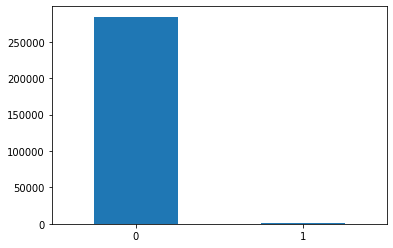

In [7]:
# Checking the target value balance

dataClasses = pd.value_counts(dataset['Class'])

dataClasses.plot(kind='bar', rot=0)

In [8]:
fraud = dataset[dataset['Class'] == 1]
valid = dataset[dataset['Class'] == 0]

fraudPer = (len(fraud)/len(valid))*100

print('Fraud Transactions: ', len(fraud))
print('Valid Transactions: ', len(valid))
print('Fraud Percentage: {}%' .format(round(fraudPer, 3)))

Fraud Transactions:  492
Valid Transactions:  284315
Fraud Percentage: 0.173%


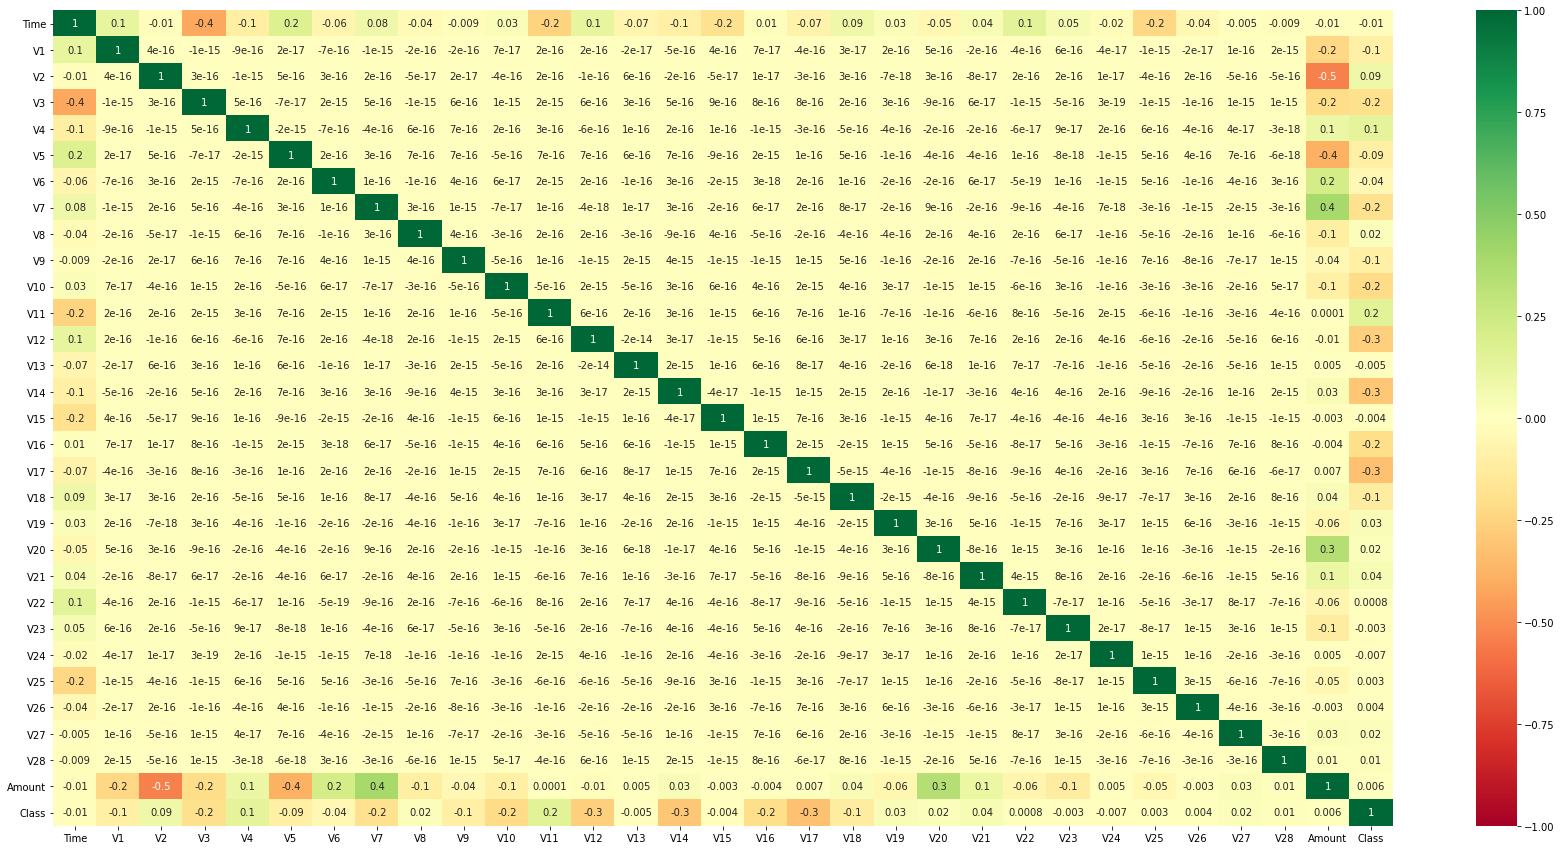

In [9]:
corr = dataset.corr(method='pearson')

figure = plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap="RdYlGn")
plt.show()

## Prepare Data to Feed the Model

In [10]:
X = dataset.iloc[:,:-1] # All the dataset until the last column
y = dataset.iloc[:,-1] # Only the last column

In [11]:
# Stratify to make sure that each class is represented with approximately equal proportions in both subsets

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Random Forest Classifier

In [12]:
# Declare the Random Forest Classifier - a group of decision trees
# Ensemble method

RFclassifier = RandomForestClassifier(n_estimators = 100,
                                     criterion = 'gini',
                                     max_depth = None)

In [13]:
# Passing our training set to the .fit() method

RFclassifier.fit(Xtrain, ytrain)

RandomForestClassifier()

In [14]:
# Compute class predictions

RFpred = RFclassifier.predict(Xtest)

## Model Evaluation

In [15]:
# Calculating AUC Score

rf_auroc = roc_auc_score(ytest, RFpred)
print('Random Forest AUROC: {}' .format(rf_auroc))

Random Forest AUROC: 0.9132301344848576


In [16]:
# Calculating FPR, TPR and Tresholds

rf_fpr, rf_tpr, thresholds = roc_curve(ytest, RFpred)

In [17]:
# Baseline, random case scenario

random = [0 for _ in range(len(ytest))]

random_auc = roc_auc_score(ytest, random)
random_fpr, random_tpr, thresholds = roc_curve(ytest, random)

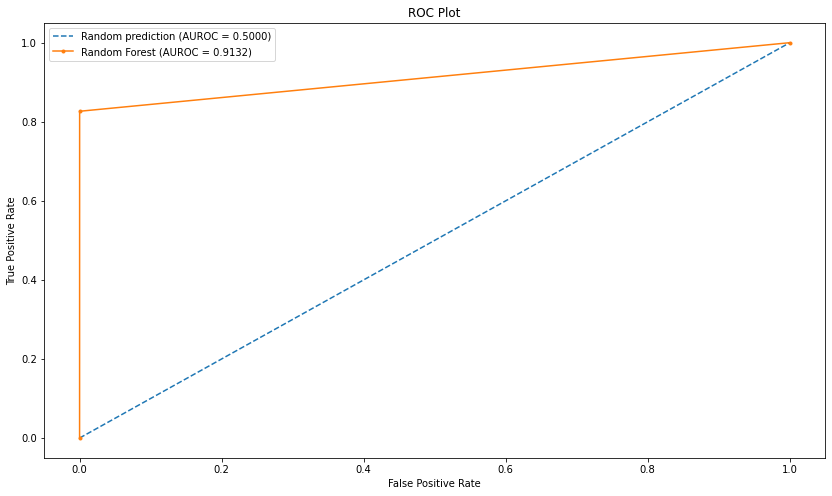

In [18]:
# Ploting the ROC Curve

figure = plt.figure(figsize=(14,8))
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random prediction (AUROC = %0.4f)' % random_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rf_auroc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

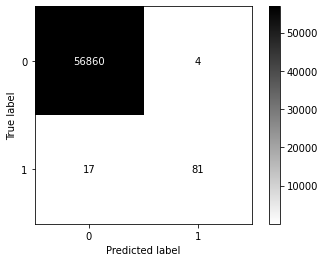

In [19]:
# Plot Confusion Matrix

plot_confusion_matrix(RFclassifier, Xtest, ytest, cmap='binary')

In [20]:
precision = precision_score(ytest, RFpred)
recall = recall_score(ytest, RFpred)

print('Precision: {}' .format(precision)) # The ratio of positive instances (frauds) predictions that were precise 
print('Recall: {}' .format(recall)) # The ratio of positive instances (frauds) correctly classified by the model

Precision: 0.9529411764705882
Recall: 0.826530612244898


In [21]:
precisions, recalls, thresholds = precision_recall_curve(ytest, RFpred)

In [22]:
def plot_PR_curve(precisions, recalls):
    figure = plt.figure(figsize=(14,8))
    plt.plot(recalls, precisions, "b--", label='PR Curve')
    plt.title('Precision vs Recall Plot')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

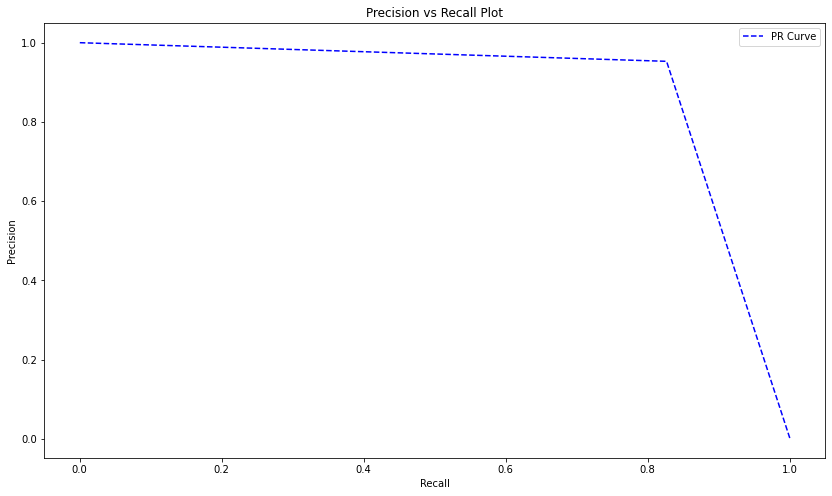

In [23]:
plot_PR_curve(precisions, recalls)

## Results



AUROC: 0.9132

Precision: 0.9529411764705882

Recall: 0.826530612244898